In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
data=pd.read_csv("Chennai houseing sale.csv")
rows_count, columns_count = data.shape
print("Data set has rows    :",rows_count)
print("Data set has columns :",columns_count)
data.head()

Data set has rows    : 7109
Data set has columns : 22


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [306]:
data.drop_duplicates()
duplicates=data.value_counts().sum()
print("Data set has rows                    :",rows_count)
print("After deleting duplicate values rows :",duplicates)

Data set has rows                    : 7109
After deleting duplicate values rows : 7056


In [307]:
null_value_each_columns=data.isnull().sum()
unique_null_rows = data[data.isnull().any(axis=1)].drop_duplicates().shape[0]
print(null_value_each_columns)
print("\nData set has rows          :",rows_count)
print("Total null value rows        :",unique_null_rows)
print("Percentage of null value rows:",(unique_null_rows/rows_count)*100)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Data set has rows          : 7109
Total null value rows        : 53
Percentage of null value rows: 0.7455338303558868


In [308]:
data.dropna(axis=0,inplace=True)
rows_count=data.shape[0]
print("Number of rows after null value removed:",rows_count)

Number of rows after null value removed: 7056


In [309]:
data.head(2)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770


In [310]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,376791.852608,140994.273384,1.088801e+07
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,143109.581793,78774.465963,3.769081e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272117.500000,84212.750000,8.266790e+06
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349444.500000,127640.500000,1.031922e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451030.500000,184449.000000,1.298148e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [311]:
from datetime import datetime
data['DATE_OF_BUILD'] = pd.to_datetime(data['DATE_BUILD'], format='%d-%m-%Y',errors='coerce')
data['DATE_OF_SALE'] = pd.to_datetime(data['DATE_SALE'], format='%d-%m-%Y',errors='coerce')
data["AGE_oF_BUILDING"]=(data["DATE_OF_SALE"]-data["DATE_OF_BUILD"]).dt.days // 365
data["REG_FEE_PERCENTAGE"]=(data["REG_FEE"]/data["SALES_PRICE"])*100

In [312]:
# Assuming 'column_name' is the column containing the misspelled words
corrections = {'Noo': 'No'}
data['PARK_FACIL'].replace(corrections, inplace=True)

corrections = {'Comercial': 'Commercial',"Others":"Other"}
data['BUILDTYPE'].replace(corrections, inplace=True)

In [313]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'DATE_OF_BUILD', 'DATE_OF_SALE', 'AGE_oF_BUILDING',
       'REG_FEE_PERCENTAGE'],
      dtype='object')

In [314]:
col=['PRT_ID', 'AREA',  'DATE_SALE', 'DIST_MAINROAD', 
         'SALE_COND',  'DATE_BUILD',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
        'DATE_OF_BUILD', 'DATE_OF_SALE', 
       ]

In [315]:
data.drop(col, axis=1, inplace=True)
data.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,SALES_PRICE,AGE_oF_BUILDING,REG_FEE_PERCENTAGE
0,1004,1.0,1.0,3,Yes,Commercial,7600000,44,5.000000
1,1986,2.0,1.0,5,No,Commercial,21717770,11,3.500000
2,909,1.0,1.0,3,Yes,Commercial,13159200,20,3.199997
3,1855,3.0,2.0,5,No,Other,9630290,22,3.700003
4,1226,1.0,1.0,3,Yes,Other,7406250,30,3.200000


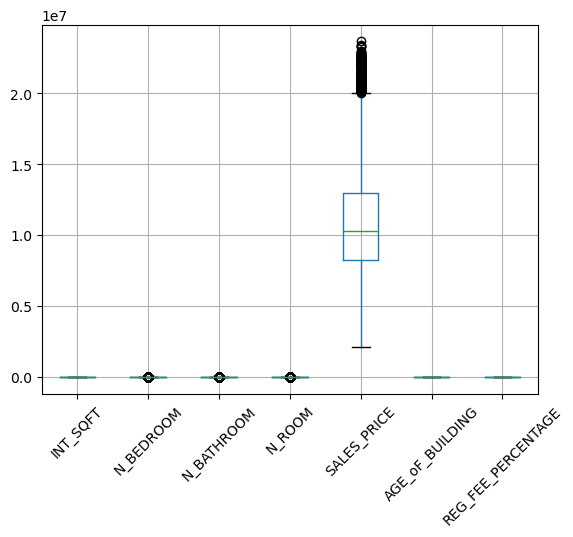

<Figure size 2000x1000 with 0 Axes>

In [316]:
data.boxplot()
plt.xticks(rotation=45)
plt.figure(figsize=(20,10))
plt.show()

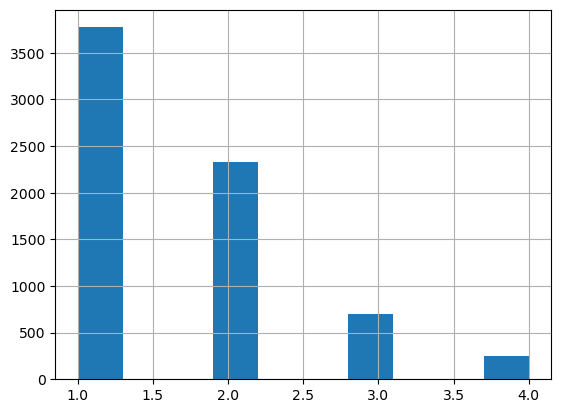

<Figure size 750x1500 with 0 Axes>

In [317]:
data["N_BEDROOM"].hist()
plt.figure(figsize=(7.5,15))
plt.show()

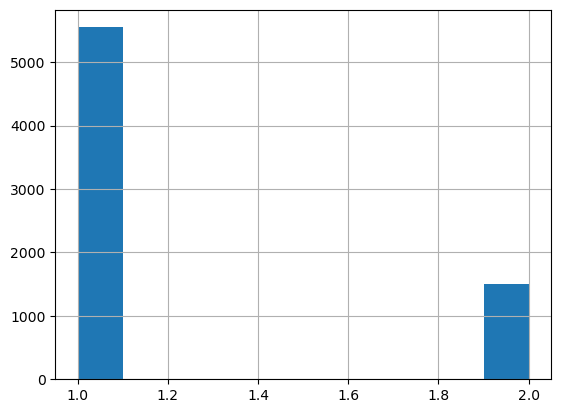

<Figure size 750x1500 with 0 Axes>

In [318]:
data["N_BATHROOM"].hist()
plt.figure(figsize=(7.5,15))
plt.show()

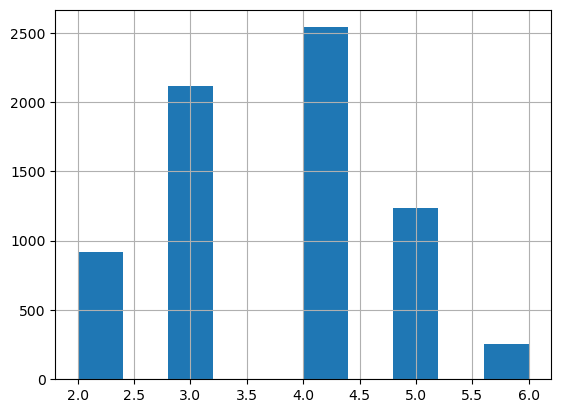

<Figure size 750x1500 with 0 Axes>

In [319]:
data["N_ROOM"].hist()
plt.figure(figsize=(7.5,15))
plt.show()

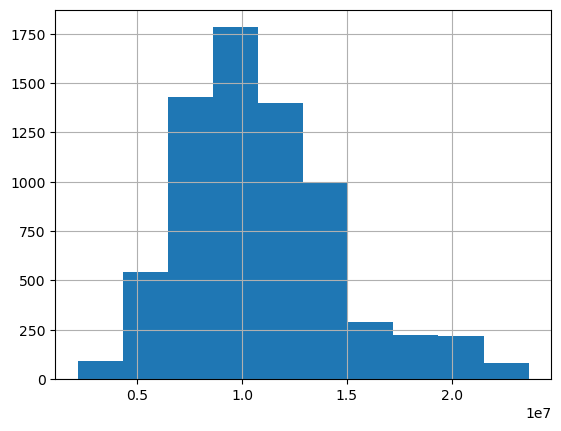

<Figure size 750x1500 with 0 Axes>

In [320]:
data["SALES_PRICE"].hist()
plt.figure(figsize=(7.5,15))
plt.show()

In [321]:
Q1 = data["SALES_PRICE"].quantile(0.25)
Q3 = data["SALES_PRICE"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data["SALES_PRICE"] >= lower_bound) & (data["SALES_PRICE"] <= upper_bound)].copy()

# Print the number of non-outlier rows
num_non_outliers = len(data)
print("Number of non-outlier rows:", num_non_outliers)

Number of non-outlier rows: 6829


In [322]:
data["PARK_FACIL"].value_counts()

No     3417
Yes    3412
Name: PARK_FACIL, dtype: int64

In [323]:
# Assuming 'data' is your DataFrame and 'column_name' is the column you want to encode
column_name1 = 'PARK_FACIL'
column_name2 = 'BUILDTYPE'
# Define the mapping dictionary for label encoding
label_mapping1 = {'Yes': 2,  'No': 1}
label_mapping2 = {'Commercial': 3, 'House': 2, 'Other': 1}

# Perform label encoding using map()
data["PARK_FACIL"] = data["PARK_FACIL"].map(label_mapping1)
data["BUILDTYPE"] = data["BUILDTYPE"].map(label_mapping2)

In [324]:
data.head(2)

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,SALES_PRICE,AGE_oF_BUILDING,REG_FEE_PERCENTAGE
0,1004,1.0,1.0,3,2,3,7600000,44,5.000000
2,909,1.0,1.0,3,2,3,13159200,20,3.199997


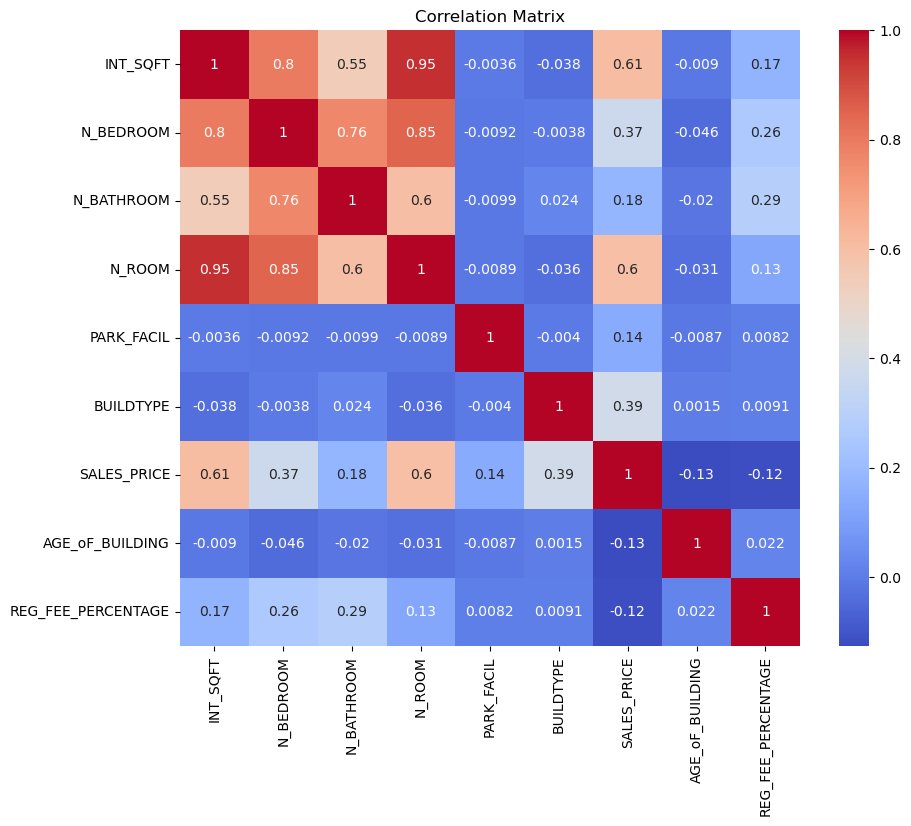

In [325]:
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [327]:
X = data.drop('SALES_PRICE', axis = 1).values
y = data["SALES_PRICE"].values
y=y.reshape(-1,1)

In [328]:
print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (6829, 8)
Shape of y: (6829, 1)


In [329]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)


In [330]:
print("shape of  X_train data",X_train.shape)
print("shape of  y_train data",y_train.shape)
print("shape of  X_test  data",X_test.shape)
print("shape of   y_test data",y_test.shape)
print("shape of  X_train data",X_val.shape)
print("shape of  y_train data",y_val.shape)

shape of  X_train data (4916, 8)
shape of  y_train data (4916, 1)
shape of  X_test  data (1366, 8)
shape of   y_test data (1366, 1)
shape of  X_train data (547, 8)
shape of  y_train data (547, 1)


In [331]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_val= scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [332]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [333]:
regression_model = LinearRegression()

In [334]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [335]:
y_pred_val = regression_model.predict(X_val)
y_pred_test = regression_model.predict(X_test)

In [336]:
cv_predictions = cross_val_predict(regression_model, X_train, y_train, cv=5)

In [337]:
r2_val = r2_score(y_val, y_pred_val)

# Calculate R-squared for the test predictions
r2_test = r2_score(y_test, y_pred_test)

# Calculate R-squared for the cross-validation predictions
r2_cv = r2_score(y_train, cv_predictions)

In [338]:
r2_df = pd.DataFrame({
    'Validation R-squared': [r2_val],
    'Test R-squared': [r2_test],
    'CV R-squared': [r2_cv]
})

# Print the R-squared dataframe
print(r2_df)

   Validation R-squared  Test R-squared  CV R-squared
0              0.664037        0.674528      0.684463


In [339]:
feature_coefficients = regression_model.coef_
feature_coefficients

array([[ 1448483.66825809, -1207279.50414643,  -330649.60605704,
         1953552.06812925,   495884.82067301,  1391347.45898384,
         -408632.13791321,  -511562.72049628]])

In [340]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [341]:
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
random_forest_model.fit(X_train, y_train)
y_train = y_train.ravel()

C:\Users\Vaidees\AppData\Local\Temp\ipykernel_14676\2559143952.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


In [342]:
y_pred_val = random_forest_model.predict(X_val)

# Predict on the test set
y_pred_test = random_forest_model.predict(X_test)

# Perform cross-validation on the training set
cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)

In [343]:
r2_val = r2_score(y_val, y_pred_val)
r2_test = r2_score(y_test, y_pred_test)

In [344]:
evaluation_df = pd.DataFrame({
    
    'Validation R-squared': [r2_val],
    
    'Test R-squared': [r2_test],
    'CV Mean Score': [cv_scores.mean()],
    
})

# Print the evaluation dataframe
print(evaluation_df)

   Validation R-squared  Test R-squared  CV Mean Score
0              0.808482        0.836312       0.837474


In [345]:
# Get feature importances
feature_importances = random_forest_model.feature_importances_
# Print feature importances with feature indices
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")

Feature 1: 0.4339221764870725
Feature 2: 0.07532146102427023
Feature 3: 0.011910296118580806
Feature 4: 0.10268319075789606
Feature 5: 0.007942361243114803
Feature 6: 0.3259834277454301
Feature 7: 0.009500774898735628
Feature 8: 0.032736311724899964


In [346]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assume we have feature matrix X and target variable y

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Reshape y_train to 1-dimensional array
y_train = y_train.ravel()

# Create an instance of the Ridge model
ridge_model = Ridge(
    alpha=1.0,  # Regularization strength, adjust as needed
      # Solver for optimization ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga')
    random_state=42,  # Random state for reproducibility
)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = ridge_model.predict(X_val)

# Predict on the test set
y_pred_test = ridge_model.predict(X_test)

# Perform cross-validation on the training set
cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5)

# Calculate evaluation metrics for the validation set
r2_val = r2_score(y_val, y_pred_val)

# Calculate evaluation metrics for the test set
r2_test = r2_score(y_test, y_pred_test)

# Create a dataframe to store the evaluation metrics
evaluation_df = pd.DataFrame({
    'Validation R-squared': [r2_val],
    'Test R-squared': [r2_test],
    'CV Mean Score': [cv_scores.mean()],
})

# Print the evaluation dataframe
print(evaluation_df)


   Validation R-squared  Test R-squared  CV Mean Score
0              0.664025        0.674538       0.684285


In [347]:
import pandas as pd
import warnings
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assume we have feature matrix X and target variable y

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Reshape y_train to 1-dimensional array
y_train = y_train.ravel()

# Create an instance of the GradientBoostingRegressor model
gradient_boosting_model = GradientBoostingRegressor(
   
    learning_rate=0.1, 
    n_estimators=100, 
    subsample=1.0, 
    criterion='friedman_mse', 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_depth=3, 
    min_impurity_decrease=0.0, 
   
    init=None, 
    random_state=42, 
    max_features=5, 
    alpha=0.9, 
    verbose=0, 
    max_leaf_nodes=None, 
    warm_start=False, 
    
    validation_fraction=0.1, 
    n_iter_no_change=None, 
    tol=0.0001, 
    ccp_alpha=0.0
)

# Fit the model on the training data
gradient_boosting_model.fit(X_train, y_train)


# Predict on the validation set
y_pred_val = gradient_boosting_model.predict(X_val)

# Predict on the test set
y_pred_test = gradient_boosting_model.predict(X_test)

# Perform cross-validation on the training set
cv_scores = cross_val_score(gradient_boosting_model, X_train, y_train, cv=5)

# Calculate evaluation metrics for the validation set

r2_val = r2_score(y_val, y_pred_val)

# Calculate evaluation metrics for the test set

r2_test = r2_score(y_test, y_pred_test)

# Create a dataframe to store the evaluation metrics
evaluation_df = pd.DataFrame({
   
    'Validation R-squared': [r2_val],
    
    'Test R-squared': [r2_test],
    'CV Mean Score': [cv_scores.mean()],
   
})

# Print the evaluation dataframe
print(evaluation_df)


   Validation R-squared  Test R-squared  CV Mean Score
0              0.876681         0.88387       0.888159


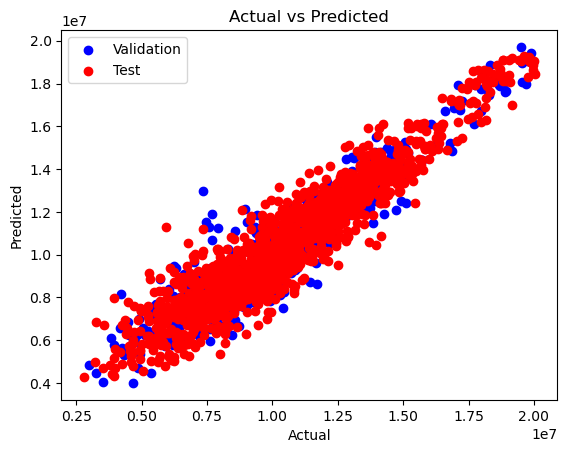

In [348]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values on the same plot
plt.scatter(y_val, y_pred_val, color='blue', label='Validation')
plt.scatter(y_test, y_pred_test, color='red', label='Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [349]:
# Example single data point
new_data_point = pd.DataFrame({
    'INT_SQFT': [1200],
    'N_BEDROOM': [2.0],
    'N_BATHROOM': [1.0],
    'N_ROOM': [4],
    'PARK_FACIL': ['Yes'],
    'BUILDTYPE': ['Commercial'],
    'AGE_oF_BUILDING': [5],
    'REG_FEE_PERCENTAGE': [4.0]
})

# Apply the same transformations to the new data point
new_data_point["PARK_FACIL"] = new_data_point["PARK_FACIL"].map(label_mapping1)
new_data_point["BUILDTYPE"] = new_data_point["BUILDTYPE"].map(label_mapping2)

# Convert the new data point to a NumPy array
new_data_point_array = np.array(new_data_point)

# Make prediction for the new data point
new_prediction = gradient_boosting_model.predict(new_data_point_array)

# Print the prediction
print(new_prediction)


[14332575.38417139]
